In [1]:
import sys
import numpy as np
import math
import ceo
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
nLenslet = 25
n = 8
nPx = n*nLenslet+1
print("pupil sampling:      %d pixel"%nPx)
detectorRes = 2*n*nLenslet/2
print("detector resolution: %d pixel"%detectorRes)
D = 25.5
src = ceo.Source("I",rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,25])
alpha =5*60.  # radius of circle where GSs are located [in arcsec]
N_GS =  3   # NUMBER of GSs
zenith_angle  = np.ones(N_GS)*alpha*math.pi/180/3600 # in radians
azimuth_angle = np.arange(N_GS)*360.0/N_GS # in degrees
tt7_gs    = ceo.Source("I",zenith=0,azimuth=0,
                       rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,25])
gs    = ceo.Source("I",zenith=zenith_angle,azimuth=azimuth_angle*math.pi/180,
                       rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,25])
#tt7 = TT7(nLenslet, n, D/nLenslet,N_PX_IMAGE=2*n,BIN_IMAGE=2,N_GS=N_GS)
#imgr = ceo.ShackHartmann(1, nPx-1, D ,DFT_osf=4,N_PX_IMAGE=0.5*(nPx-1))nLenslet, n, D/nLenslet,N_PX_IMAGE=2*n,BIN_IMAGE=2,N_GS=N_GS
wfs = ceo.ShackHartmann(nLenslet, n, D/nLenslet,N_PX_IMAGE=2*n,BIN_IMAGE=2,N_GS=N_GS)
gmt = ceo.GMT_MX(D,nPx,M1_radial_order=6)

pupil sampling:      201 pixel
detector resolution: 200 pixel


array([ 1.27835071,  1.27870846,  1.27870321], dtype=float32)

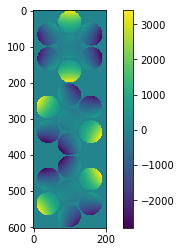

In [3]:
gs.reset()
gmt.reset()
wfs.reset()
mas2rad = 1e-3*math.pi/180/3600
#gmt.M1.global_tiptilt(50*mas2rad,50*mas2rad)
gmt.propagate(gs)
imshow(gs.phase.host(units='nm'))
colorbar()
gs.wavefront.rms()*1e6

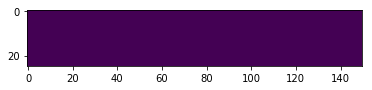

In [4]:
wfs.calibrate(gs,0.75)
imshow(wfs.c.host(shape=(2*nLenslet*gs.N_SRC,nLenslet)).T,interpolation='none')

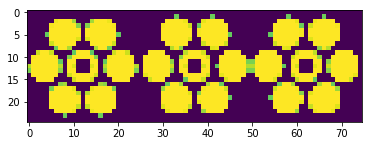

In [5]:
imshow(wfs.flux.host().T,interpolation='none')

In [6]:
print("Expected # of valid slopes/current # of valid slopes : %d/%d"%(1740,wfs.n_valid_slopes))

Expected # of valid slopes/current # of valid slopes : 1740/1740


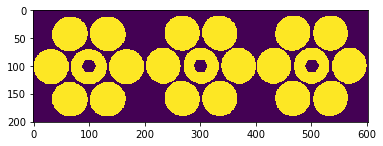

In [7]:
A = gs.amplitude.host()
#A = gs.rays.vignetting.host(shape=(3*nPx,nPx))
imshow(A.T,interpolation='none')

In [8]:
print("Expected flux/current flux : %d/%.0f"%(65154,A.sum()))

Expected flux/current flux : 65154/65154


In [9]:
B = A.reshape((3,nPx,nPx))

Expected vignetted flux/current vignetted flux : 2431/2431


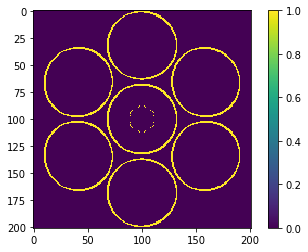

In [10]:
C = B.sum(axis=0)
C[C==3] = 0
C[C!=0] = 1
imshow(C,interpolation='none')
colorbar()
print("Expected vignetted flux/current vignetted flux : %d/%.0f"%(2431,C.sum()))

In [11]:
gmt.reset()
gmt.M1.motion_CS.euler_angles[0,0] = 0.25*ceo.constants.ARCSEC2RAD
gmt.M1.motion_CS.euler_angles[1,1] = -0.25*ceo.constants.ARCSEC2RAD
gmt.M1.motion_CS.origin[3,0] = 50e-6
gmt.M1.motion_CS.origin[4,1] = 50e-6
gmt.M1.motion_CS.update()
gs.reset()
gmt.propagate(gs)

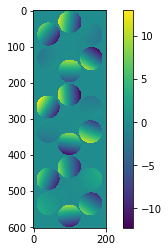

In [12]:
imshow(gs.phase.host(units='micron'))
colorbar()

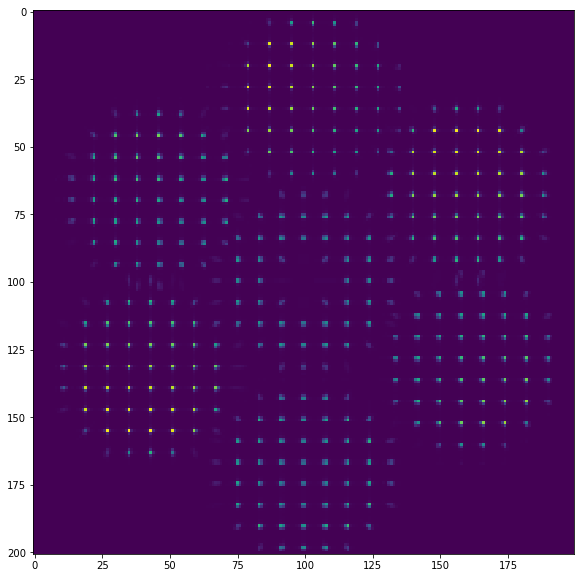

In [13]:
wfs.reset()
wfs.analyze(gs)
fig = figure()
fig.set_size_inches(10,10)
imshow(wfs.frame.host()[:nPx,:nPx],interpolation='none')

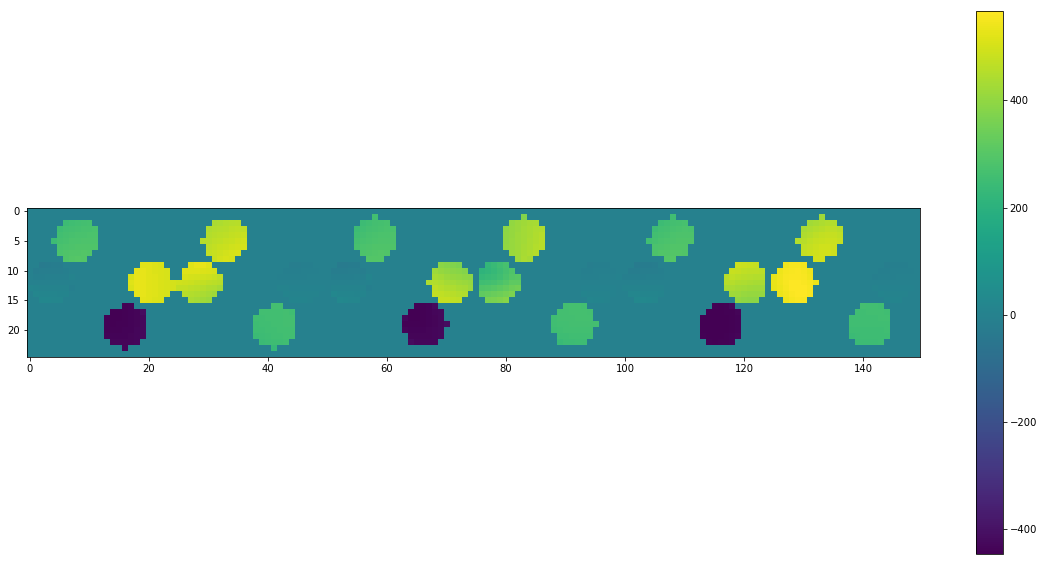

In [14]:
fig = figure()
fig.set_size_inches(20,10)
imshow(wfs.c.host(shape=(gs.N_SRC*nLenslet*2,nLenslet),units='mas').T,
       interpolation='none')
colorbar()